In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
#import kuramoto as kmox
import plot as pltfn
from kuramoto1 import Kuramoto
import admin_functions as adfn
sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

In [2]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnraw, p20raw

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTY

# Baseline vs Pre-seizure vs Seizure 
* we want traces that show clear separation of brain states (pre-ictal, ictal, post-ictal)
* if maximum of mean trace is >4x minimum of mean trace - then generalised events occur, pre and post-ictal periods


In [5]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnbin = sorted(glob.glob('*BLN*0binarised.npy'))
p20bin = sorted(glob.glob('*PTZ20*0binarised.npy'))
blnnnb = sorted(glob.glob('*BLN*nnb*'))
p20nnb = sorted(glob.glob('*PTZ20*nnb*'))
blnraw, p20raw


(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTY

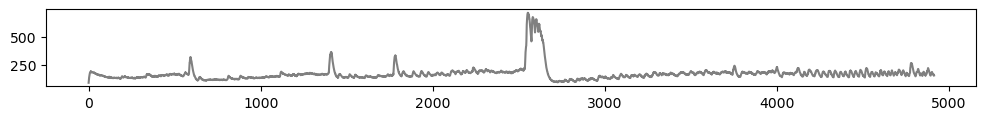

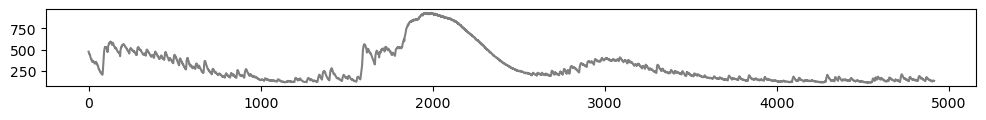

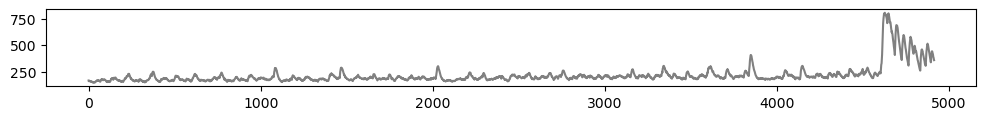

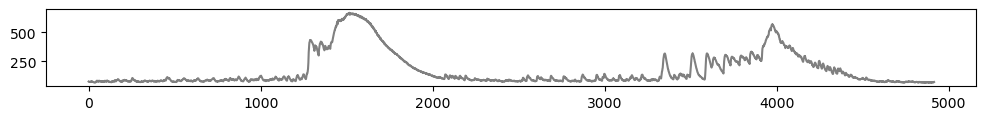

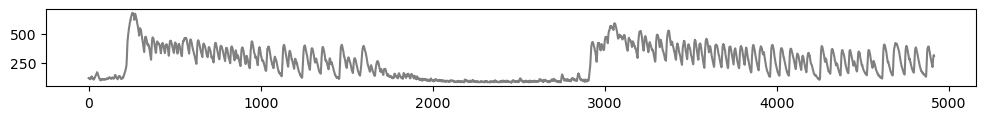

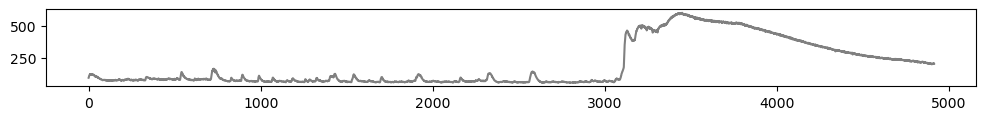

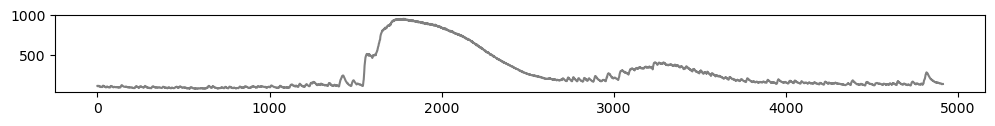

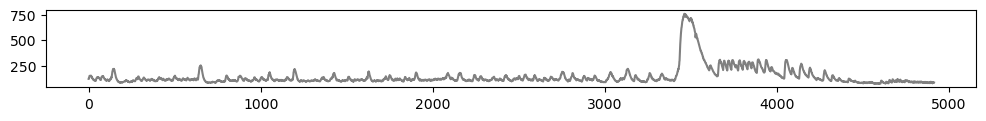

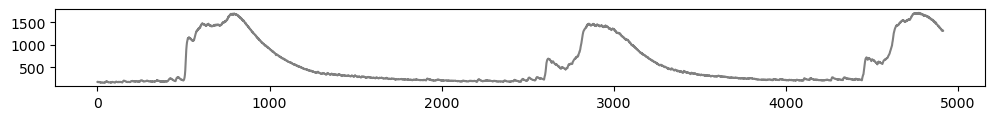

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy'],
       dtype='<U66'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-07_2photon_se

In [6]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist = [],[],[],[],[],[]
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    if 4*mini < maxi:
        fig, ax = plt.subplots(figsize= (12,1))  
        plt.plot(mean, c='grey')
        gen_list = np.append(gen_list, p20raw[o])
        gen_blist = np.append(gen_blist, p20bin[o])
        gen_nnblist = np.append(gen_nnblist, p20nnb[o])
        sub_bln_list = np.append(sub_bln_list, blnraw[o])
        sub_bln_blist = np.append(sub_bln_blist, blnbin[o])
        sub_bln_nnblist = np.append(sub_bln_nnblist, blnnnb[o])
        plt.show()
gen_list, gen_blist, gen_nnblist

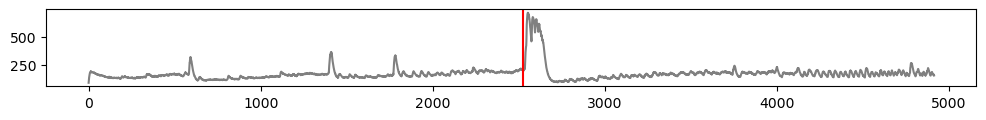

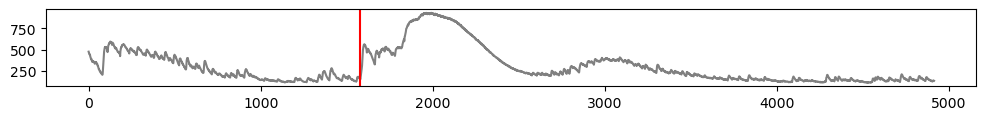

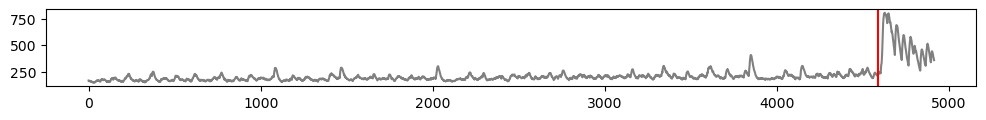

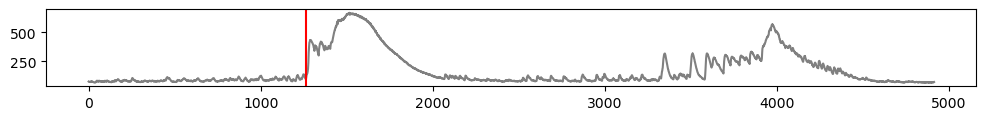

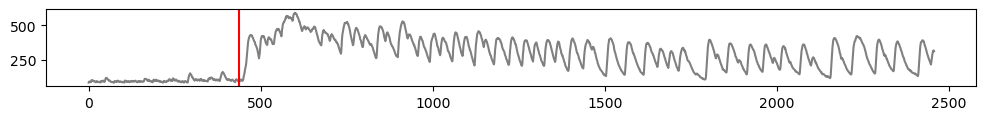

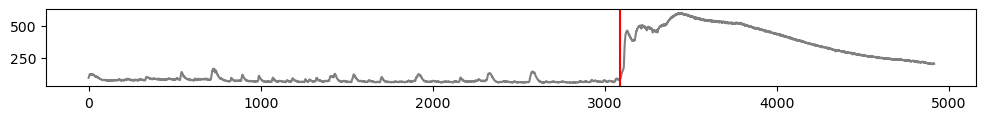

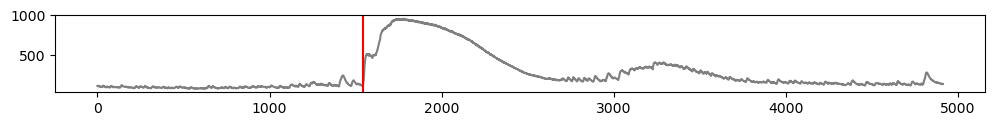

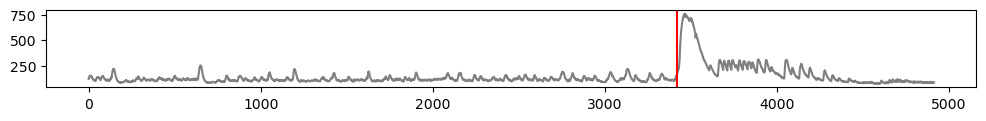

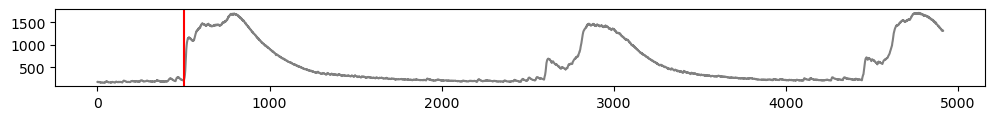

In [7]:
#IDENTIFY GENERALISED EVENT
max_list = list(range(len(gen_list)))
for o in range(len(gen_list)):
    p20 = np.load(gen_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    if o == 4:
        mean = mean[np.int(mean.shape[0]/2):]
    window = adfn.window(30, mean.shape[0])[0]
    diffs = list(range(mean.shape[0] - window))
    for t in range(mean.shape[0]):
        if t == mean.shape[0] - window:
            break
        diff_vec = np.zeros(window)
        for e in range(window):
            diff_vec[e] = mean[t+e] - mean[t] 
        diffs[t] = diff_vec
    
    sums, maxs = list(range(len(diffs))),list(range(len(diffs)))
    for i in range(len(diffs)):
        maxs[i] = np.max(diffs[i])

    fig, ax = plt.subplots(figsize= (12,1))  
    when = np.where(maxs ==  np.max(maxs))[0]
    plt.plot(mean, c = 'grey')
    for x in when: plt.axvline(x=x, c='red')
    max_list[o] = np.where(maxs ==  np.max(maxs))[0]
    plt.show()

In [8]:
#Time series for baseline, preictal, ictal analysis
import random
window = 400
bln_list, bln_blist = list(range(len(gen_list))),list(range(len(gen_list)))
pre_list, pre_blist = list(range(len(gen_list))),list(range(len(gen_list)))
p20_list, p20_blist = list(range(len(gen_list))),list(range(len(gen_list)))

for e in range(len(gen_list)):
    bln_ran = random.randint(0,4914-window)
    bln_list[e] = np.load(sub_bln_list[e])[:,bln_ran:bln_ran+window]
    bln_blist[e] = np.load(sub_bln_blist[e])[:,bln_ran:bln_ran+window]
    if e == 4:
        pre_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
    else:
        pre_list[e] = np.load(gen_list[e])[:,max_list[e][0]-window:max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]-window:max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,max_list[e][0]:max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]:max_list[e][0]+window]

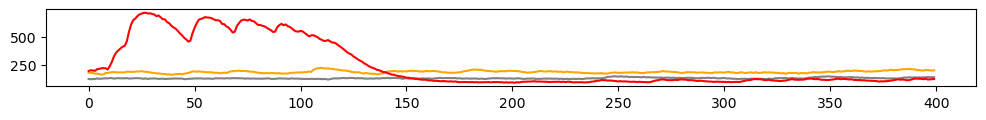

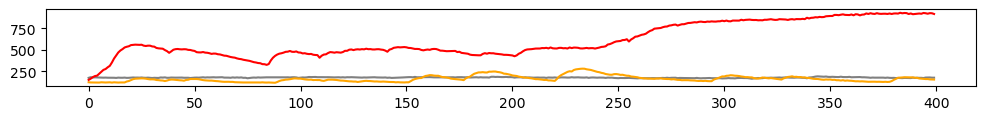

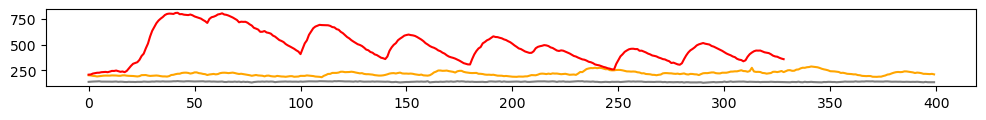

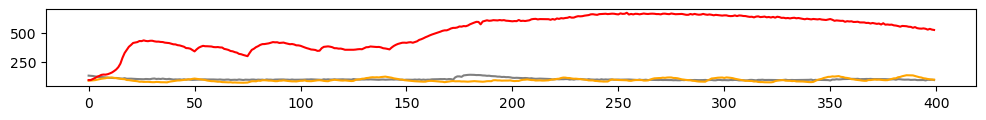

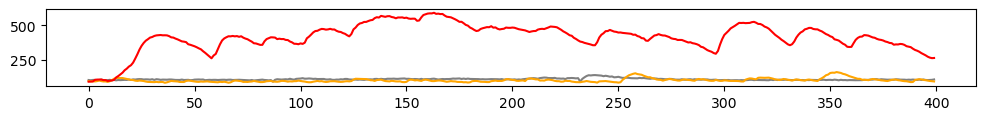

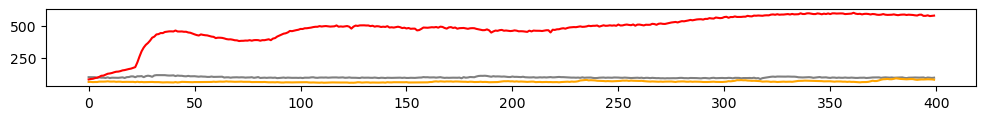

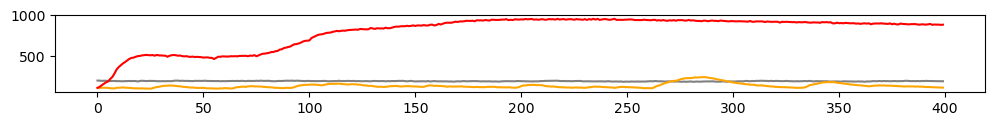

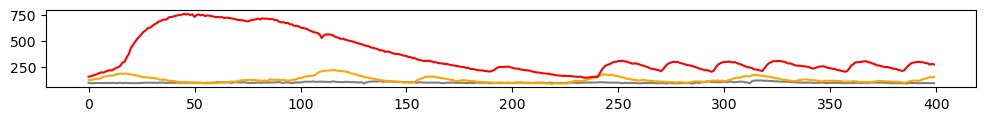

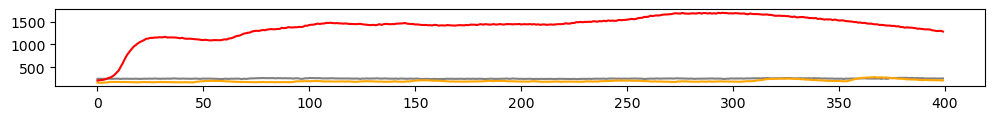

In [9]:
#Check time series
for i in range(len(bln_list)):
    fig, ax = plt.subplots(figsize= (12,1))  
    mean = np.apply_along_axis(np.mean, 0, bln_list[i])
    plt.plot(mean, c='grey')
    mean = np.apply_along_axis(np.mean, 0, pre_list[i])
    plt.plot(mean, c='orange')
    mean = np.apply_along_axis(np.mean, 0, p20_list[i])
    plt.plot(mean, c='red')
    plt.show()

## Functional connectivity - Distance


In [9]:
# Create lists of bin
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
binlist = sorted(glob.glob('*-corrdist*'))
distlist = sorted(glob.glob('*BLN*_dist.npy*'))
tracelist = sorted(glob.glob('*BLN*_cutrealtrace.npy*'))
distlist, tracelist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_dist.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_dist.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6d

In [ ]:
### Connectivity-distance
#Construct sublist
b_distlist, p_distlist = list(range(len(gen_list))), list(range(len(gen_list)))
for i in range(len(gen_list)):
    b_distlist[i], p_distlist[i] = adfn.save_name(i, sub_bln_list) + '_dist.npy', adfn.save_name(i, gen_list) +  '_dist.npy'
b_distlist, p_distlist

In [ ]:
savepath = Fdrop + 'Project/' + experiment + os.sep 

#Calculate corr-dist binning
for i in range(len(distlist)):
    trace = np.load(tracelist[i])
    corr = np.corrcoef(trace)
    corrdistbin = crfn.corrdis_bin(corr, np.load(distlist[i]), 100)
    np.save(savepath + adfn.save_name(i,distlist) + '_' + '100-corrdist_bins.npy', corrdistbin)
    print('DOne' + str(i))

In [30]:
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
binlist1 = sorted(glob.glob('*100-corrdist*'))
binlist2 = sorted(glob.glob('*02*BLN*_corrdist*'))
binlist1, binlist2

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_100-corrdist_bins.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy'])

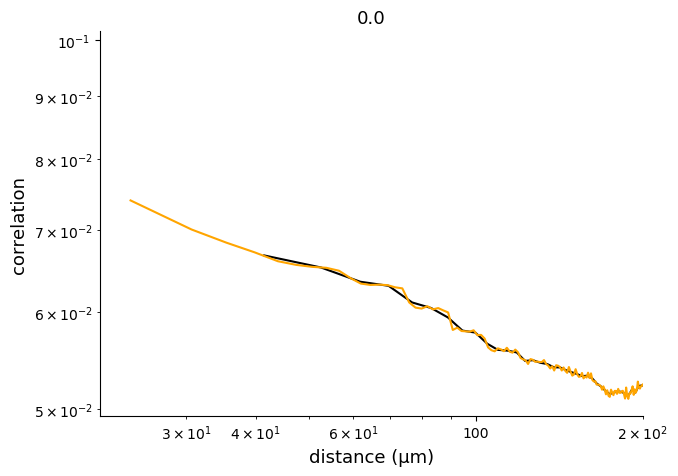

In [39]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist1)):
    xaxis = np.load(binlist1[i])[0]
    yaxis = np.load(binlist1[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = 'k')
for i in range(len(binlist2)):
    xaxis = np.load(binlist2[i])[0]
    yaxis = np.load(binlist2[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = 'orange')
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlim(right = 200)

axarr.set_xlabel('distance (μm)', size = '13')
axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.set_title(str(np.mean(slope)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


In [1]:
import matplotlib
import powerlaw
from scipy import stats
sns.reset_orig()
num1 = ['02', '04', '05', '07', '08', '09', '10', '11', '12']

blnslope, preslope, p20slope = list(range(9)), list(range(9)), list(range(9))
colors = ['k','#ff7f0e','#d62728']
lines = ['-', '--', '--']
count=0
i = num1[1]
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*E-' + i + '*randbase*-corrdist_bins*'))
p5list = sorted(glob.glob('*E-' + i + '*preictal*-corrdist_bins*'))
p20list = sorted(glob.glob('*E-' + i + '*_ictal*-corrdist_bins*'))
plotlist = [blnlist,p5list,p20list]
slopelist = [blnslope,preslope,p20slope]
slope2list = [blnslope,preslope,p20slope]
fig, axarr = plt.subplots(figsize = (7,5))
for e in range(len(plotlist)):
    data = np.load(plotlist[e][0])
    xaxis = data[0]
    yaxis = data[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
    slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
    slope2list[e][count] = [-1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:100]),np.log10(yaxis[:len(xaxis)-1][1:100]))[0], -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][100:]),np.log10(yaxis[:len(xaxis)-1][100:]))[0]]

count+=1
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('corrdis_ptz.svg', transparent = True)

plt.show()

NameError: name 'sns' is not defined

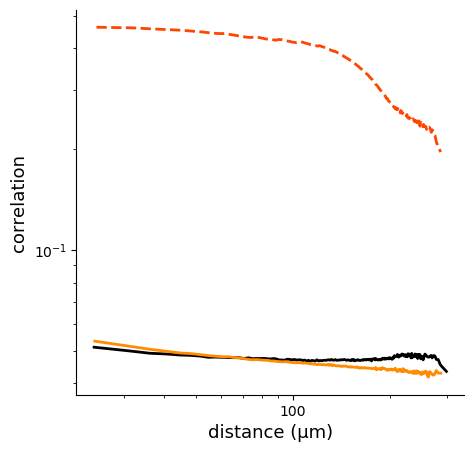

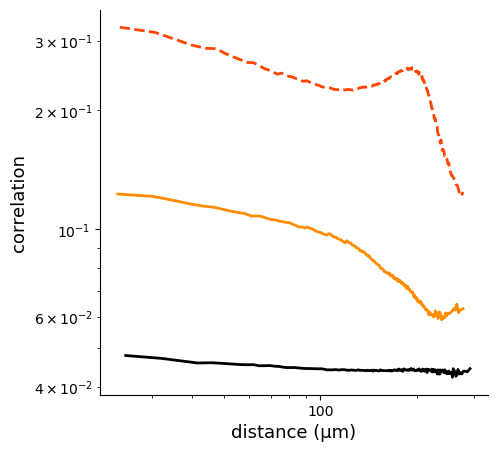

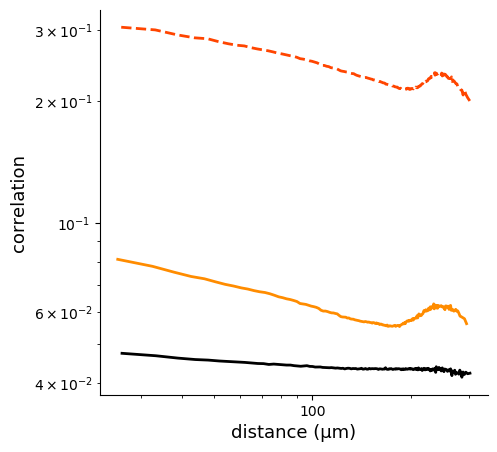

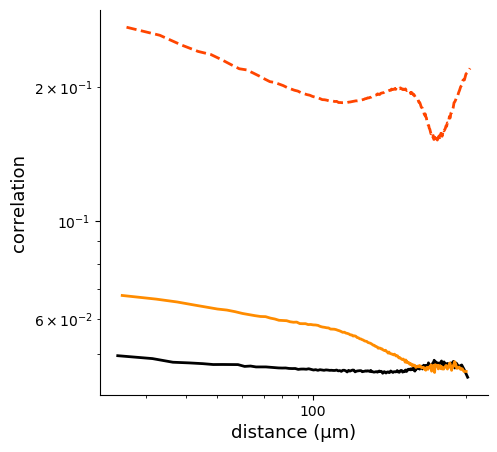

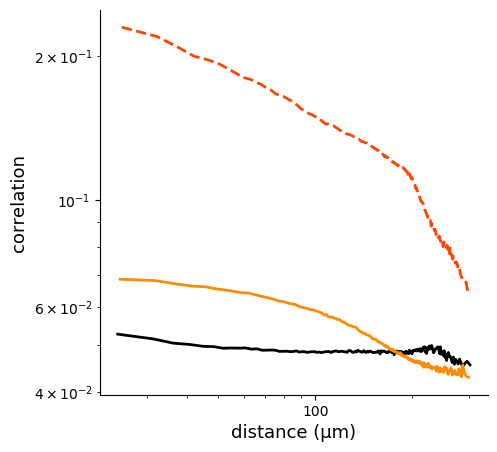

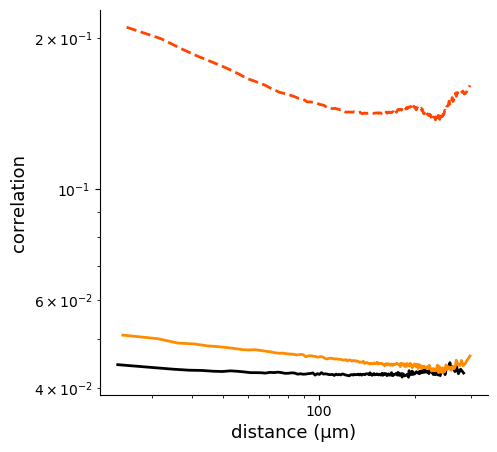

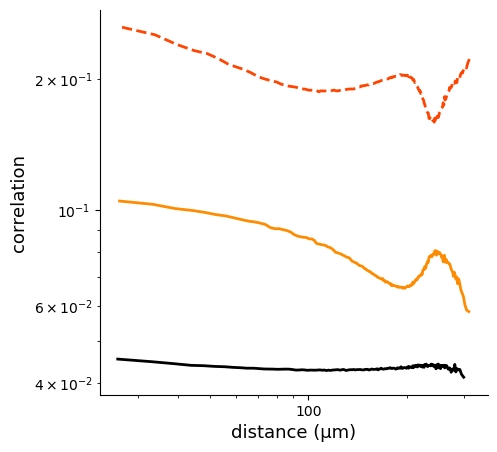

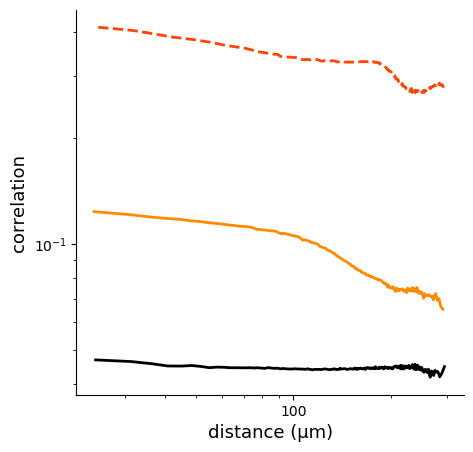

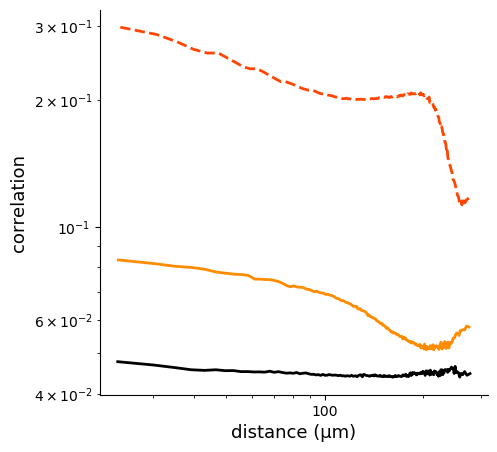

In [14]:
import matplotlib
import powerlaw
from scipy import stats
sns.reset_orig()
num1 = ['02', '04', '05', '07', '08', '09', '10', '11', '12']

blnslope, preslope, p20slope = list(range(9)), list(range(9)), list(range(9))
colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '--']
count=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*randbase*-corrdist_bins*'))
    p5list = sorted(glob.glob('*E-' + i + '*preictal*-corrdist_bins*'))
    p20list = sorted(glob.glob('*E-' + i + '*_ictal*-corrdist_bins*'))
    plotlist = [blnlist,p5list,p20list]
    slopelist = [blnslope,preslope,p20slope]
    slope2list = [blnslope,preslope,p20slope]
    fig, axarr = plt.subplots(figsize = (5,5))
    for e in range(len(plotlist)):
        data = np.load(plotlist[e][0])
        xaxis = data[0]
        yaxis = data[1]
        axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
        slope2list[e][count] = [-1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:100]),np.log10(yaxis[:len(xaxis)-1][1:100]))[0], -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][100:]),np.log10(yaxis[:len(xaxis)-1][100:]))[0]]
 
    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_xlabel('distance (μm)', size = '13')
    axarr.set_xticklabels(['100', '100', '100', '100'])
    axarr.set_ylabel('correlation', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

In [19]:
#EXPONENT
import pand
exp = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})
#exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})



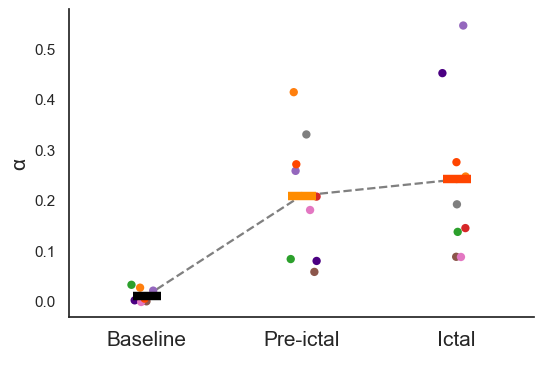

In [20]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'Pre-ictal', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [21]:
adfn.ttest(exdf, 'Labels', 'Exponent', ['Baseline', 'Pre-ictal', 'Ictal'], mode='multiple')[0]

[[nan, nan, 0.016666666666666666, 'Not significant', 'Baseline - Baseline'],
 [-5.012947372786983,
  0.0010359466490774377,
  0.016666666666666666,
  'Significant',
  'Baseline - Pre-ictal'],
 [-4.340866185917196,
  0.0024754998751735247,
  0.016666666666666666,
  'Significant',
  'Baseline - Ictal']]

# Sliding window 

In [ ]:
for o in range(len(gen_list)):
    choose = o
    data = np.load(gen_list[choose])
    mean = np.apply_along_axis(np.mean, 0, data)
    window = adfn.window(400, mean.shape[0])[0]

    #PLOT MEAN DIST BY SEGMENTS
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    from matplotlib.colors import ListedColormap, BoundaryNorm

    y = mean
    x = np.linspace(0,mean.shape[0]-1, mean.shape[0])
    z = np.zeros(mean.shape[0])
    count=0
    for i in range(len(data_list)):
        z[count:count+window] = i+1
        count+=window


    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be numlines x points per line x 2 (x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    fig, ax = plt.subplots(figsize= (12,1))
    lc = LineCollection(segments, cmap=plt.get_cmap('cool'), norm=plt.Normalize(0, len(data_list)))
    lc.set_array(z)
    lc.set_linewidth(2)
    plt.gca().add_collection(lc)

    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.show()

    #DIST-CORR
    import matplotlib
    import sys
    from scipy import stats
    
    
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,len(data_list))))
    fig, axarr = plt.subplots(figsize = (5,5))
    for i in range(len(np.load(binlist[o]))):
        xaxis = np.load(binlist[o])[i][0]
        yxais = np.load(binlist[o])[i][1]
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 0.5, markersize = 0.5, alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_xlabel('distance (μm)', size = '13')
    #axarr.set_xticklabels(['100', '100',])
    axarr.set_ylabel('correlation', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()


In [ ]:
### Connectivity-distance
#Construct sublist
b_distlist, p_distlist = list(range(len(gen_list))), list(range(len(gen_list)))
for i in range(len(gen_list)):
    b_distlist[i], p_distlist[i] = adfn.save_name(i, sub_bln_list) + '_dist.npy', adfn.save_name(i, gen_list) +  '_dist.npy'
b_distlist, p_distlist

In [ ]:
savepath = Fdrop + 'Project/' + experiment + os.sep 
for o in range(len(gen_list)):
    data = np.load(gen_list[o])
    mean = np.apply_along_axis(np.mean, 0, data)
    window = adfn.window(370, mean.shape[0])[0]

    #DIST-CORR
    import matplotlib
    import sys
    from scipy import stats
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))
    
    for e in range(np.int(mean.shape[0]/window)):
        sub_data = data[:,count:count+window]
        corr = np.corrcoef(sub_data)
        data_list[count1] = crfn.corrdis_bin(corr, np.load(p_distlist[o]),  200)
        print(len(data_list[count1][0]))
        count+=window
        count1+=1
        
    np.save(savepath + adfn.save_name(o,p_distlist) + '_' + 'dynamic-corrdist-bins.npy', data_list)
    print('Done fish ' + gen_list[o])